In [1]:
import pandas as pd

data = pd.read_csv("dds_ch2_nyt\\nyt1.csv")
age_groups = ["<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

data



,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


<AxesSubplot:>

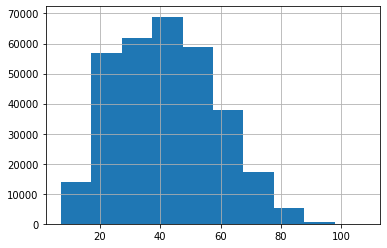

In [2]:
data_no_null_age = data[data.Age > 0]

data_no_null_age.Age.hist()

In [3]:
def setAgeGroup(age):
    if (age < 18):
        return "<18"
    elif (age < 25):
        return "18-24"
    elif (age < 35):
        return "25-34"
    elif (age < 45):
        return "35-44"
    elif (age < 55):
        return "45-54"
    elif (age < 65):
        return "55-64"
    elif (age >= 65):
        return "65+"

data_no_null_age["AgeGroup"] = data_no_null_age.Age.apply(lambda x: setAgeGroup(x))

data_no_null_age
    

<ipython-input-3-ef807857fbf0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null_age["AgeGroup"] = data_no_null_age.Age.apply(lambda x: setAgeGroup(x))


,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


In [4]:
grouped_data = data_no_null_age.groupby("AgeGroup")

<AxesSubplot:xlabel='AgeGroup'>

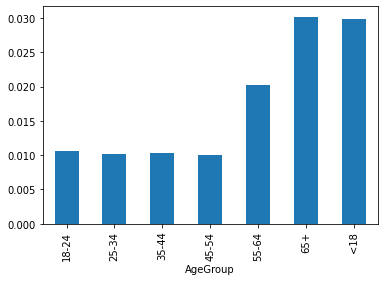

In [5]:
def findCTR():
    ctr_data = grouped_data[["Clicks", "Impressions"]].mean()
    ctr_data["CTR"] = ctr_data.Clicks / ctr_data.Impressions
    return ctr_data["CTR"]

ctr_data = findCTR()
ctr_data.plot(kind="bar")

<AxesSubplot:xlabel='Gender(0-male, 1-female)', ylabel='Count'>

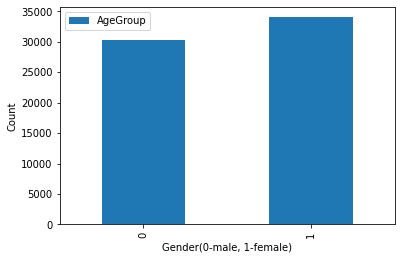

In [6]:
def genderComparison(age_group):
    genders_comparison = data_no_null_age.loc[data_no_null_age["AgeGroup"] == age_group]
    genders_comparison = genders_comparison[["AgeGroup", "Gender"]].groupby("Gender").count()
    return genders_comparison

genders = []

for i in range(len(age_groups)):
    genders.append(genderComparison(age_groups[i]))
genders[4].plot(kind='bar', xlabel="Gender(0-male, 1-female)", ylabel="Count")

<AxesSubplot:xlabel='Age Group', ylabel='Impressions mean'>

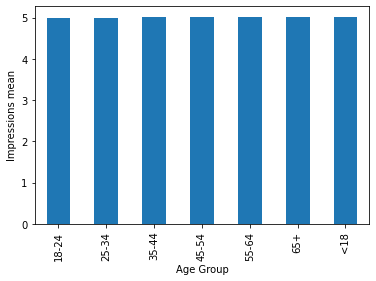

In [7]:
mean_impressions = grouped_data["Impressions"].mean()
mean_impressions.plot(kind="bar", xlabel="Age Group", ylabel="Impressions mean")

In [8]:
median_impressions = grouped_data["Impressions"].median()
median_impressions# .plot(kind="bar", xlabel="Age Group", ylabel="Impressions median")

AgeGroup
18-24    5.0
25-34    5.0
35-44    5.0
45-54    5.0
55-64    5.0
65+      5.0
<18      5.0
Name: Impressions, dtype: float64

<AxesSubplot:xlabel='Age Group', ylabel='Impressions max'>

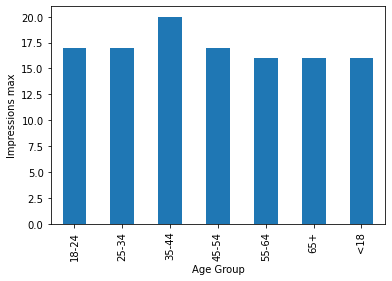

In [9]:
# def maxImpressions(age_group):
#     max_impressions = data_no_null_age.loc[data_no_null_age["AgeGroup"] == age_group]
#     return max_impressions[["AgeGroup", "Gender", "Impressions"]].groupby("Gender").Impressions.max()

# maxDF = pd.DataFrame()

# for i in range(len(age_groups)):
#     maxDF = medianDF.append(maxImpressions(age_groups[i]), ignore_index=True)

# maxDF.plot(kind="bar", xlabel="Age Group", ylabel="Impressions max")

max_impressions = grouped_data["Impressions"].max()
max_impressions.plot(kind="bar", xlabel="Age Group", ylabel="Impressions max")

<AxesSubplot:xlabel='Age Group', ylabel='Impressions dispersion'>

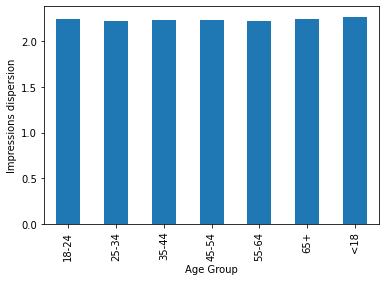

In [10]:
disp_impressions = grouped_data["Impressions"].std()
disp_impressions.plot(kind="bar", xlabel="Age Group", ylabel="Impressions dispersion")

In [11]:
final_data_frame = mean_impressions.to_frame()
final_data_frame["Median Impressions"] = median_impressions
final_data_frame["Max Impressions"] = max_impressions
final_data_frame["Dispersion Impressions"] = disp_impressions
final_data_frame

,Impressions,Median Impressions,Max Impressions,Dispersion Impressions
AgeGroup,,,,
18-24,5.002826,5.0,17,2.244950
25-34,4.993829,5.0,17,2.226877
35-44,5.021507,5.0,20,2.237829
45-54,5.010406,5.0,17,2.240790
55-64,5.022308,5.0,16,2.230206
65+,5.012347,5.0,16,2.249162
<18,5.007159,5.0,16,2.271897
